In [29]:
%load_ext autoreload
%autoreload 2
import pickle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
with open('datas/hrrr/datas_fit.pkl', 'rb') as f:
    datas = pickle.load(f)

In [66]:
datas[0].output_std.item()

5.50857400894165

In [62]:
round(datas[0].gp.likelihood.noise.item(), 3)

0.003

In [63]:
from tabulate import tabulate

table = []
for i in range(len(datas)):
    row = [
        datas[i].date,
        datas[i].level,
        round(datas[i].gp.kernel.outputscale.item(),2) * datas[i].output_std,
        round(datas[i].gp.kernel.base_kernel.lengthscale[0][0].item(),4) * 24,
        round(datas[i].gp.kernel.base_kernel.lengthscale[0][1].item(),4) * datas[i].input_std,
        round(datas[i].gp.kernel.base_kernel.lengthscale[0][2].item(),4) * datas[i].input_std,
        round(datas[i].gp.likelihood.noise.item(),4) * datas[i].output_std,
        round(tools.rmse(datas, scale = 1/86400)),
    ]
    table.append(row)

headers = [
    "Date",
    "Level",
    "Variance (k)",
    "Temporal lengthscale (h)",
    "Zonal lengthscale (m)",
    "Meridonial lengthScale (m)",
    "Noise variance"
    "RMSE"
]

print(tabulate(table, headers, tablefmt="latex"))


AttributeError: 'data' object has no attribute 'output_std'

In [35]:
from tabulate import tabulate

In [36]:
latex_table = tabulate(table_rows, tablefmt="latex", headers=["Main Row", "Subrow", "Col1", "Col2", "Col3", "Col4", "Col5", "Col6"])


In [38]:
print(latex_table)


\begin{tabular}{llllllll}
\hline
 Main Row   & Subrow   & Col1                & Col2                                                     & Col3   & Col4   & Col5   & Col6   \\
\hline
 2024-07-27 &          &                     &                                                          &        &        &        &        \\
            & 500 mb   & 0.4930683374404907  & tensor([0.2718, 0.1763, 0.0927], grad\_fn=\ensuremath{<}MulBackward0\ensuremath{>}) & 11     & black  &        &        \\
 2024-07-27 &          &                     &                                                          &        &        &        &        \\
            & 700 mb   & 0.6269837617874146  & tensor([0.3284, 0.1380, 0.1130], grad\_fn=\ensuremath{<}MulBackward0\ensuremath{>}) & 11     & black  &        &        \\
 2024-09-05 &          &                     &                                                          &        &        &        &        \\
            & 500 mb   & 0.5966188907623291  & t

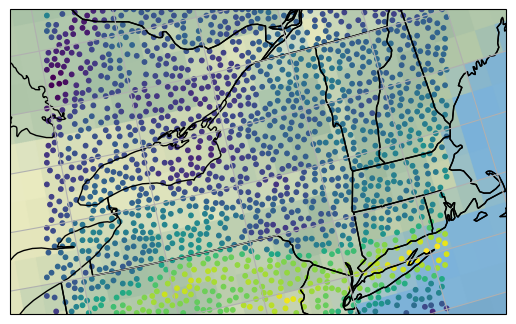

In [3]:
fig = datas[0].plot_observations(datas[0].indices)

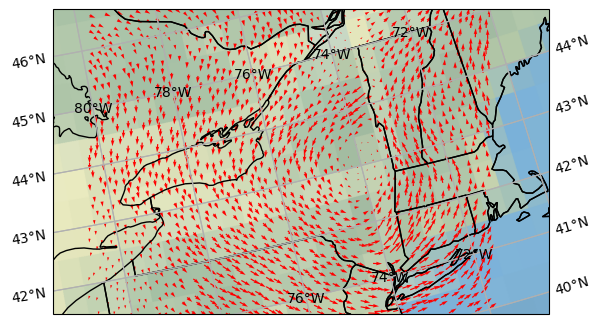

In [12]:
datas[2].plot_vel(datas[2].indices, frame = 5)

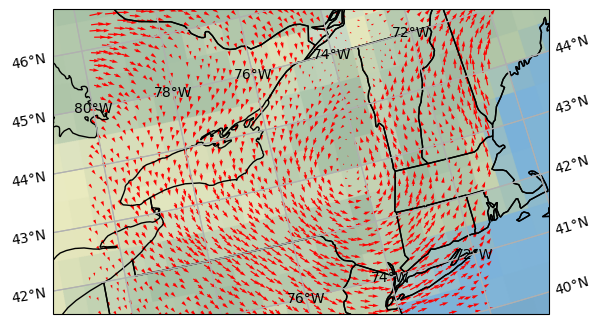

In [11]:
datas[2].plot_vel_data(datas[2].indices, frame = 5)

In [20]:
datas[0].XY.min(dim = 0)[0],  datas[0].XY.max(dim = 0)[0]

(tensor([1370479.8750,  458693.8438]), tensor([2144479.7500, 1046693.8750]))

In [21]:
import torch
x = torch.linspace(1370479.8750,2144479.7500,10)
y = torch.linspace(458693.8438,1046693.8750,10)

X,Y = torch.meshgrid(x,y,indexing='xy')
XY = torch.stack([X,Y], dim = -1).reshape(-1,2)

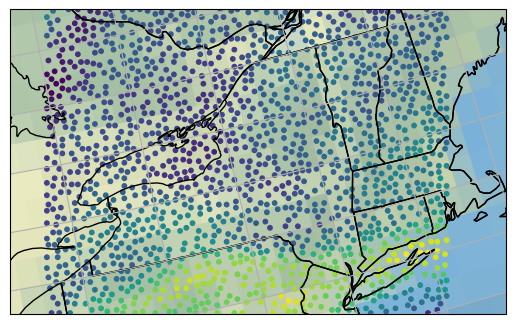

In [26]:
fig = datas[0].plot_observations(datas[0].indices)

In [27]:
fig

In [70]:
from main import tools
tools.rmse(datas[0], 1/86400)

[tensor(2.5489),
 tensor(2.3096),
 tensor(2.1189),
 tensor(1.8450),
 tensor(1.7191),
 tensor(1.8647),
 tensor(2.2643)]